## Data Mining: Lab 4 - examples - clustering / exemple - gruparea datelor

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs     # to generate test datasets
from sklearn.cluster import KMeans          # for KMeans
from sklearn.cluster import AgglomerativeClustering # for hierarchical clustering / grupare ierarhica
from sklearn.cluster import DBSCAN          # for density based clustering / grupare bazata pe analiza densitatii
from sklearn.cluster import OPTICS          # for density based clustering / grupare bazata pe analiza densitatii
from sklearn.mixture import GaussianMixture # for Expectation Maximization (EM)
from sklearn.metrics import silhouette_score # evaluate the clustering using silhouette score
from sklearn.metrics import rand_score       # evaluate the clustering using rand index (when the true clusters ar known)

### Exercise 0:  get familiar with the clustering methods implemented in ScikitLearn / familiarizare cu metodele de grupare implementate in ScikitLearn

#### Hint: take a look on https://scikit-learn.org/stable/modules/clustering.html#clustering (Section 2.3.1) / parcurgere ttps://scikit-learn.org/stable/modules/clustering.html#clustering (sect 2.3.1) 

Text(0.5, 1.0, 'Synthetic 2d data/ Date sintetice bidimensionale')

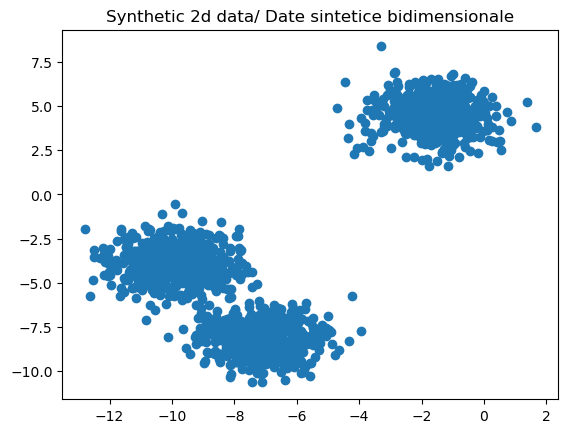

In [2]:
n_samples = 1500
random_state = 1
X, y = make_blobs(n_samples=n_samples, random_state=random_state)
plt.scatter(X[:, 0], X[:, 1])
plt.title("Synthetic 2d data/ Date sintetice bidimensionale")

C:\Users\A1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'kMeans')

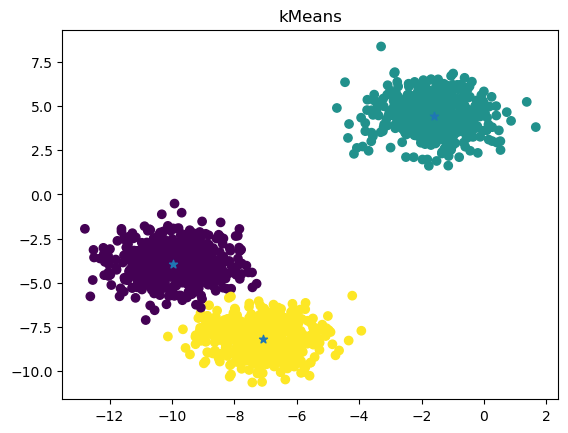

In [11]:
# kMeans = find prototypes for 3 clusters/ determinare prototipuri pentru 3 clustere
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
clustKMeans = KMeans(n_clusters=3, random_state=random_state).fit(X)
y_predKmeans = clustKMeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_predKmeans)  # use the detected cluster as color / utilizare eticheta cluster pt culoare
centroidX = clustKMeans.cluster_centers_[:,0]  # coordinates of the centroids / coordonatele centroizilor
centroidY = clustKMeans.cluster_centers_[:,1]
plt.scatter(centroidX, centroidY, marker = "*")
plt.title("kMeans")

### Exercise 1:  clustering with kMeans / grupare cu kMeans

In [13]:
from pandas import read_csv
iris = read_csv('iris.csv')

In [18]:
iris

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [27]:
iris2Dattr= iris2D.iloc[:,2:4]

In [28]:
iris2Dclass=iris2D.iloc[:,4]

In [30]:
# construction of the partition / construirea partitiei
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(iris2Dattr)

C:\Users\A1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [31]:
# labels of the clusters corresponding to the data / etichetele clusterelor pt datele din set
labelsFit=kmeans.labels_
labelsFit

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [32]:
# labels obtained by predict (it can be used for new data) / etichete obtinute prin predictie (se poate aplica pentru date care nu au fost uilizate la construirea clusterelor)
labelsPredict=kmeans.predict(iris2Dattr)
labelsPredict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [33]:
# centers of the clusters / centroizii 
centroids=kmeans.cluster_centers_
centroids

array([[4.26923077, 1.34230769],
       [1.464     , 0.244     ],
       [5.59583333, 2.0375    ]])

Text(0.5, 1.0, 'kMeans - iris')

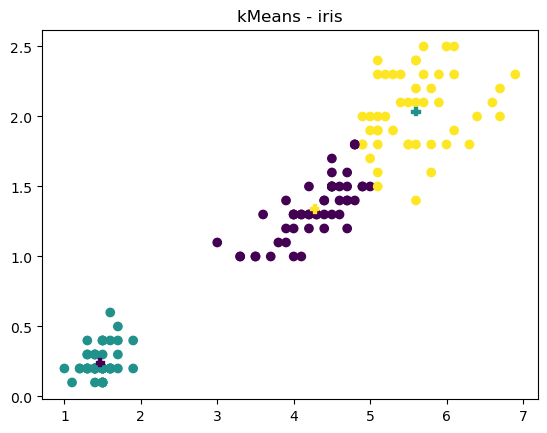

In [34]:
# visualization of the clusters and centroids / vizualizare clustere si centroizi
X=np.array(iris2Dattr)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], marker="P", c=[2,0,1])
plt.title("kMeans - iris")

#### Question 1:  
 1. analyze the influence of 'init' ({‘k-means++’, ‘random’}) and 'algorithm' ({'lloyd', 'elkan'})  parameters / analizați influența diferitelor variante de inițializare precum și a variantelor de ajustare iterativă a centroizilor
 2. estimate the number of clusters using the silhouette score  / estimati numarul de clustere folosind scorul silhoutte (hint:  https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

In [ ]:
...

### Exercise 2:  hierarchical clustering / grupare folosind algoritmi ierarhici

In [35]:
# construction of the hierarchy / construirea ierarhiei de clustere
agg = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(iris2Dattr)

In [36]:
agg.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

Text(0.5, 1.0, 'Agglomerative clustering - iris')

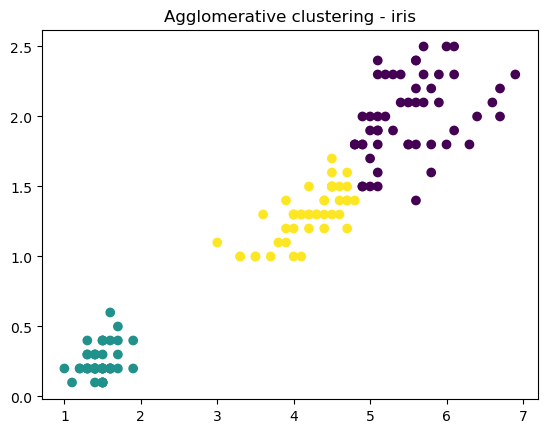

In [37]:
# visualization of the clusters
X=np.array(iris2Dattr)
plt.scatter(X[:, 0], X[:, 1], c=agg.labels_)
plt.title("Agglomerative clustering - iris")

In [38]:
# no centers are generated by hierarchical clustering / algoritmii ierarhici nu genereaza prototipuri pentru clustere
agg.cluster_centers_  

AttributeError: 'AgglomerativeClustering' object has no attribute 'cluster_centers_'

##### Remark: 
 * Dendrogram visualization / vizualizare dendrograma (source: https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-download-auto-examples-cluster-plot-agglomerative-dendrogram-py)

In [39]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

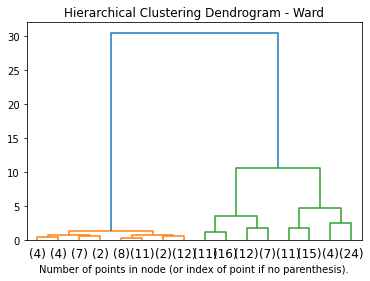

In [18]:
aggWard = AgglomerativeClustering(n_clusters=None, linkage='ward',compute_full_tree=True,distance_threshold=0).fit(iris2Dattr)
plt.title("Hierarchical Clustering Dendrogram - Ward")
plot_dendrogram(aggWard, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

##### Remark / Obs:  
 * variant without the specification of the number of clusters (the cut point is set based on the distance threshold: if the distance between two data instances is larger than the threshold the date will be not merged anymore) / dacă nu se specifică numărul de clustere se poate specifica un prag referitor la măsura de disimilaritate (dacă disimilaritatea dintre două date este mai mare decât valoarea pragului atunci se consideră că datele nu pot face parte din același cluster)

In [46]:
agg2 = AgglomerativeClustering(n_clusters=None, linkage='ward',compute_full_tree=True, distance_threshold=1).fit(iris2Dattr)

In [47]:
# cluster labels / etichete ale clusterelor
agg2.labels_

array([ 6,  6,  6,  6,  6,  4,  6,  6,  6,  6,  6,  4,  6,  6,  6,  4,  6,
        6,  4,  4,  4,  4,  6,  4,  4,  4,  4,  6,  6,  4,  4,  4,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  4,  4,  6,  4,  6,  6,  6,  9,
        9,  8,  7,  9,  5,  9,  3,  9,  7,  3,  5,  7,  9,  3,  5,  9,  7,
        9,  7,  8,  7,  8,  9,  5,  5,  9,  8,  9,  3,  7,  3,  7,  8,  9,
        9,  9,  5,  7,  7,  5,  9,  7,  3,  5,  5,  5,  5,  3,  7,  2,  0,
        2, 10,  2, 11,  9,  1,  1,  2,  0,  0,  2,  0,  0,  0, 10, 11, 11,
        8,  2,  0, 11,  8,  2,  1,  8,  8,  2,  1,  1,  1,  2,  8, 10,  2,
        2, 10,  8,  0,  2,  0,  0,  2,  2,  0,  0,  0,  0,  0],
      dtype=int64)

In [48]:
# number of clusters / numar de clustere identificate
agg2.n_clusters_

12

#### Question 2: 
 1. find the distance threshold for which the number of identified clusters is 3 / determinati valoarea pt distance_threshold pt care numarul de clustere identificate este 3;
 
 1. analyze the influence of the linkage type on the clustering result (linkage: {‘ward’, ‘complete’, ‘average’, ‘single’}) / analizati influenta tipului de linkage asupra rezultatului (see also https://scikit-learn.org/stable/auto_examples/cluster/plot_linkage_comparison.html#sphx-glr-auto-examples-cluster-plot-linkage-comparison-py)

In [ ]:
...

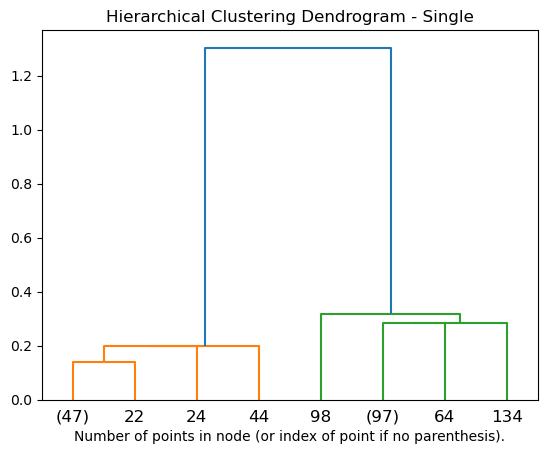

In [50]:
# Hint (2) - single linkage
aggSingle = AgglomerativeClustering(n_clusters=None, linkage='single',compute_full_tree=True,distance_threshold=0).fit(iris2Dattr)
plt.title("Hierarchical Clustering Dendrogram - Single")
plot_dendrogram(aggSingle, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

### Exercise 3:  density based clustering / grupare bazată pe densitate

In [61]:
dbscan = DBSCAN(eps=1).fit(iris2Dattr)   

In [62]:
dbscan.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

Text(0.5, 1.0, 'DBSCAN (eps=1) - iris')

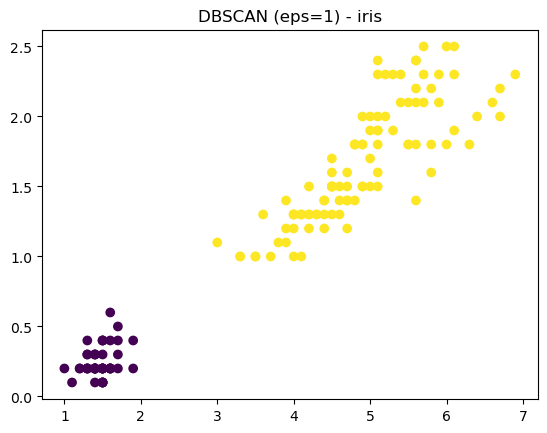

In [63]:
# visualization of the clusters / vizualizare clustere
X=np.array(iris2Dattr)
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_)
plt.title("DBSCAN (eps=1) - iris")

#### Question 3: 
 1. can you find a value for eps such that the number of clusters is 3? / puteti gasi o valoare pt eps astfel incat numarul de clustere sa fie 3?
 1. analyze the influence of 'min_samples' (minimum number of elements in the neighborhood of a core point) / analizati influenta parametrului 'min_samples' (numarul minim de elemente din vecinatatea unui punct nucleu)

In [64]:
# OPTICS uses a variable neighborhood radius
optics = OPTICS(min_samples=7).fit(iris2Dattr)   

In [65]:
# labels equal to -1 correspond to noise /  etichetele egale cu -1 corespund datelor de tip zgomot
optics.labels_

array([ 0,  0, -1, -1,  0, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1,
        2, -1,  1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  2, -1,
        2, -1,  3,  1, -1, -1,  1, -1, -1,  3,  2, -1, -1, -1, -1, -1,  2,
        2,  2, -1,  1,  1, -1,  2, -1, -1,  1,  1,  1,  1, -1,  1, -1,  3,
       -1, -1, -1, -1,  2, -1, -1, -1,  3,  3, -1,  3, -1, -1, -1, -1, -1,
        3,  4,  3, -1,  3,  4, -1,  3,  3, -1, -1, -1, -1,  4, -1, -1, -1,
        4, -1,  3, -1,  4, -1,  3,  4,  4,  4,  3,  3,  4,  3])

Text(0.5, 1.0, 'OPTICS (min_samples=7) - iris')

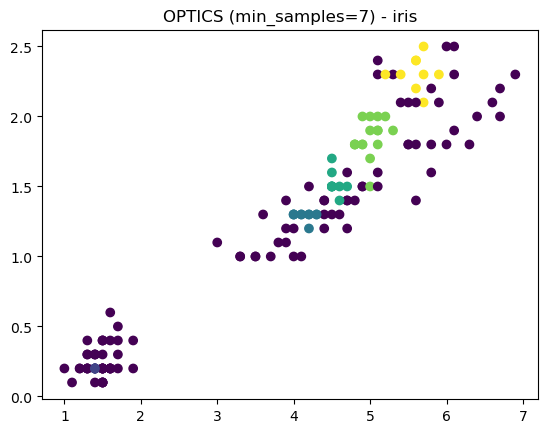

In [66]:
X=np.array(iris2Dattr)
plt.scatter(X[:, 0], X[:, 1], c=optics.labels_)
plt.title("OPTICS (min_samples=7) - iris")

#### Question 4:  visualize the data instances which are considered to be noise/ vizualizati datele care sunt considerate zgomot

In [ ]:
...

### Exercise 4:  Expectation Maximization

In [67]:
em = GaussianMixture(n_components=3, covariance_type="full").fit(iris2Dattr)

C:\Users\A1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [68]:
# means of the distributions from the mixture / medii ale distributiilor care constituie mixtura
em.means_

array([[1.4639995 , 0.24399977],
       [5.57721357, 2.04303223],
       [4.30594389, 1.34787855]])

In [70]:
# GaussianMixture does not have labels_ attribute (the labels should be estimated by applying predict)
# GaussianMixture nu are atributul labels_ (etichetele trebuie estimate aplicand predict)
emLabels=em.predict(iris2Dattr) 

Text(0.5, 1.0, 'EM - iris')

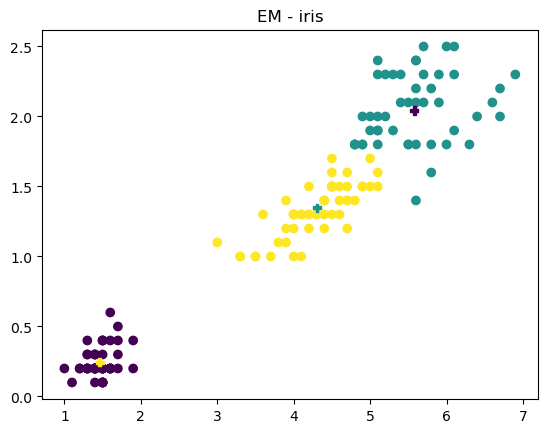

In [71]:
# visualization of the clusters and centroids / vizualizare clustere si centroizi
X=np.array(iris2Dattr)
plt.scatter(X[:, 0], X[:, 1], c=emLabels)
plt.scatter(em.means_[:,0], em.means_[:, 1], marker="P", c=[2,0,1])
plt.title("EM - iris")

In [72]:
# weights of mixture components / ponderile asociate mixturii
em.weights_

array([0.33333288, 0.3146746 , 0.35199252])

In [73]:
# covariance matrices of the components of the mixture / matricile de covarianta ale componentelor mixturii
em.covariances_

array([[[0.02950483, 0.00558393],
        [0.00558393, 0.01126496]],

       [[0.30034404, 0.04402642],
        [0.04402642, 0.07200287]],

       [[0.24667106, 0.08489917],
        [0.08489917, 0.04585074]]])

In [74]:
# sampling data using the parameters estimated using Expectation Maximization /generare date folosind parametrii estimati prin Expectation Maximization
sampledData=em.sample(150)

Text(0.5, 1.0, 'EM - sampled data based on the estimated mixture')

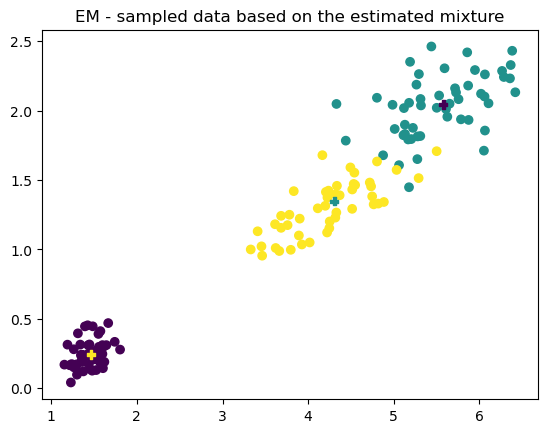

In [75]:
X=np.array(sampledData[0])
plt.scatter(X[:, 0], X[:, 1], c=sampledData[1])
plt.scatter(em.means_[:,0], em.means_[:, 1], marker="P", c=[2,0,1])
plt.title("EM - sampled data based on the estimated mixture")


#### Question 5: 
 * Compare the results obtained by kMeans, Agglomerative Clustering, DBSCAN, OPTICS and EM  using Silhouette metrics (Hint: silhouette_score(iris2Dattr, kmeans.labels_)) / comparati rezultatele obtinute folosind kMeans, alg aglomerativ, DBSCAN, OPTICS si EM  folosind indicele silhouette (Indicatie: silhouette_score(iris2Dattr, kmeans.labels_))
 * Remark:  for other clustering quality metrics see https://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation (section 2.3.10) / pt alte metrici de evaluare a calitatii gruparii: https://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation (sect 2.3.10).  Example:  rand_score(kmeans.labels_, iris2Dclass)

In [ ]:
...

### Additional example:  clustering of documents
 * https://scikit-learn.org/stable/auto_examples/text/plot_document_clustering.html#sphx-glr-auto-examples-text-plot-document-clustering-py

In [ ]:
### Homework
 
 * Apply kMeans, an agglomerative algorithm, DBSCAN and EM oComparati, folosind indexul silhouette, rezultatele obtinute aplicand kMeans, un algoritm aglomerativ, DBSCAN si EM pe un set de date la alegere.
